**ogs@jupyter-lab: M process: Disc with a hole**

<!--- ![tu-dresden-blue.png](attachment:tu-dresden-blue.png) --->
<img src="ogs-workflows.png" alt="drawing" width="300"/>

**Running ogs using [ogs6py](https://github.com/joergbuchwald/ogs6py)**

In [2]:
from ogs6py import ogs
PATH_OGS="/home/ok/ogs/build/release/bin/"
print("===============")
print(">>> run ogs <<<")
model = ogs.OGS(PROJECT_FILE="disc_with_hole.prj", MKL=False)
model.geo.add_geom(filename="disc_with_hole.gml")
model.mesh.add_mesh(filename="disc_with_hole.vtu")
model.run_model(path=PATH_OGS,LOGFILE="disc_with_hole.log")

>>> run ogs <<<
OGS finished with project file disc_with_hole.prj.
Execution took 0.32965993881225586 s


**Extracting results using [VTUInterface](https://github.com/joergbuchwald/VTUinterface)**

>>> print results <<<
disc_with_hole.pvd


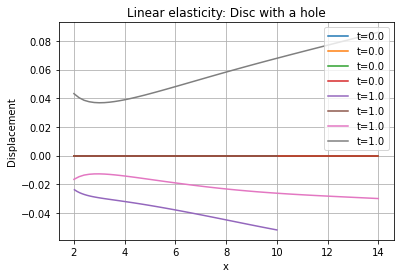

In [3]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
print("=====================")
print(">>> print results <<<")
pvdfile=vtuIO.PVDIO("disc_with_hole.pvd", dim=2)
xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=10.0, num=100)]
r_x = np.array(xaxis)[:,0]
diagonal = [(i,i,0) for i in np.linspace(start=0.0, stop=14.0, num=100)]
r_diag = np.sqrt(np.array(diagonal)[:,0]**2+np.array(diagonal)[:,1]**2)
time = [0.0,1.0]
for t in time:
    function_xaxis_t = pvdfile.read_point_set_data(t, 'displacement', pointsetarray=xaxis)
    plt.plot(r_x, function_xaxis_t, label='t='+str(t))
    function_diagonal_t = pvdfile.read_point_set_data(t, 'displacement', pointsetarray=diagonal)
    plt.plot(r_diag, function_diagonal_t, label='t='+str(t))
titlestring="Linear elasticity: Disc with a hole"
plt.title(titlestring)
plt.xlabel('x')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.savefig("disc_with_hole.png")
plt.show()

**Show 2d plots**

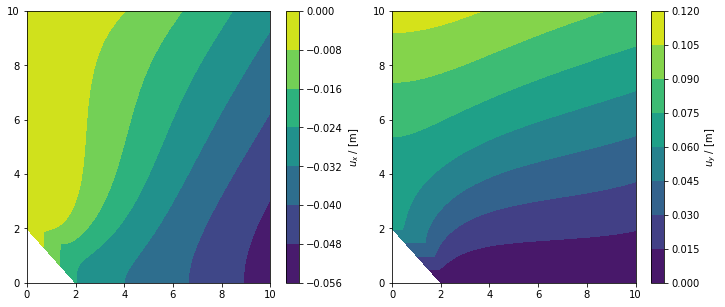

In [6]:
m_plot=vtuIO.VTUIO("disc_with_hole_ts_4_t_1.000000.vtu", dim=2)
triang=tri.Triangulation(m_plot.points[:,0],m_plot.points[:,1])
ux_plot = m_plot.get_point_field("displacement").T[0]
uy_plot = m_plot.get_point_field("displacement").T[1]
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
contour_left = ax[0].tricontourf(triang, ux_plot)
contour_right = ax[1].tricontourf(triang, uy_plot)
fig.colorbar(contour_left,ax=ax[0],label='$u_x$ / [m]')
fig.colorbar(contour_right,ax=ax[1],label='$u_y$ / [m]')

**Results have been shown using [matplotlib](https://matplotlib.org/)**

**OGS links**
- description: https://www.opengeosys.org/docs/benchmarks/small-deformations/mechanics-linear-disc-with-hole/
- project file: https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/Mechanics/Linear/disc_with_hole.prj

**Credits**
- Jörg Buchwald for [ogs6py](https://joergbuchwald.github.io/VTUinterface-doc/) and [VTUInterface](https://joergbuchwald.github.io/ogs6py-doc/)
- Dima Naumov for this benchmark set up